In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import statistics as stat
import math
df=pd.read_csv('C:/Users/deepesh/Downloads/StudentsPerformance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#   1. Find out how many males and females participated in the test.

In [18]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

[]

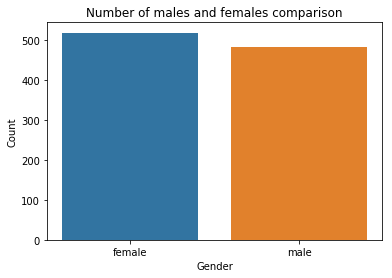

In [95]:
sns.countplot(df['gender'])
plt.title('Number of males and females comparison')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.plot()

#    2. What do you think about the students' parental level of education?

In [22]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

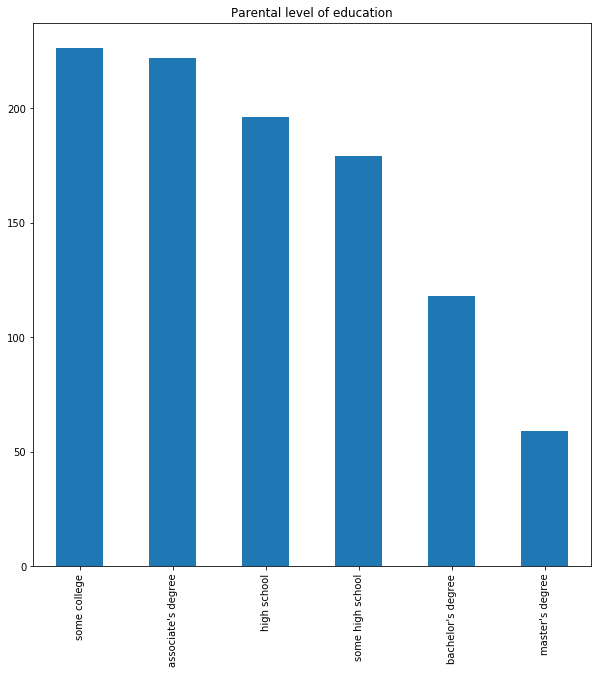

In [23]:
df['parental level of education'].value_counts().plot(kind='bar', title='Parental level of education',figsize=(10,10))

#         Who scores the most on average for math, reading and writing based on ● Gender● Test preparation course

In [7]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


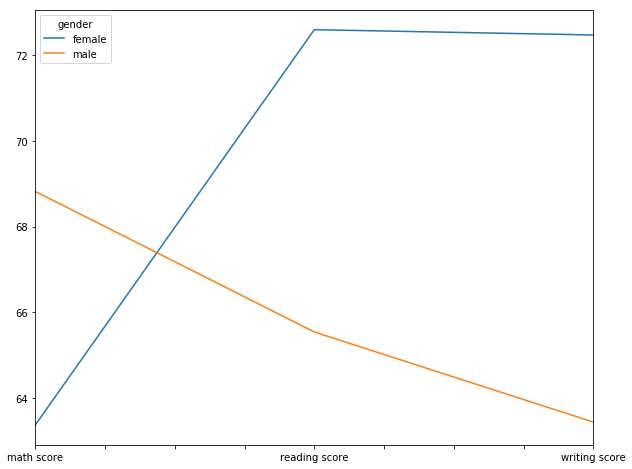

In [96]:
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(10,8))

In [9]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


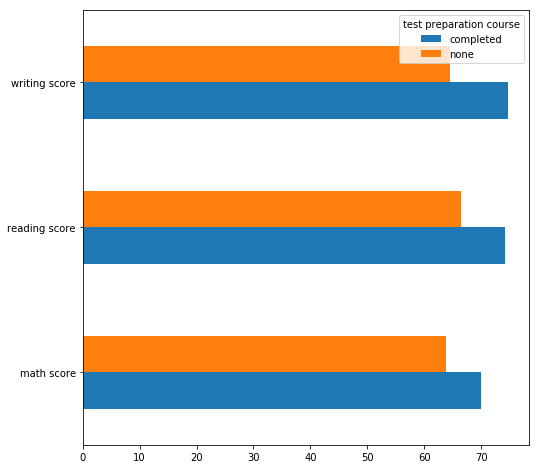

In [97]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='barh', figsize=(8,8))

#  What do you think about the scoring variation for math, reading and writing based on ● Gender ● Test preparation course

In [82]:
mask1= (df['gender']=='female')
df[mask1].describe()

,math score,reading score,writing score
count,518.000000,518.000000,518.000000
mean,63.376448,72.590734,72.467181
std,16.029928,14.411018,14.844842
min,0.000000,17.000000,10.000000
25%,54.000000,63.250000,64.000000
50%,65.000000,73.000000,74.000000
75%,74.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


In [83]:
mask= (df['gender']=='male')
df[mask].describe()

,math score,reading score,writing score
count,482.000000,482.000000,482.000000
mean,68.821577,65.545643,63.446058
std,14.556411,14.149594,14.227225
min,27.000000,23.000000,15.000000
25%,59.000000,56.000000,53.000000
50%,69.000000,66.000000,64.000000
75%,79.000000,76.000000,74.000000
max,100.000000,100.000000,100.000000


In [81]:
df[['test preparation course', 'gender','math score',
    'writing score','reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            74             71             72
none                    female          62             70             71
                        male            67             60             63

#  The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [103]:
df['bonus_points'] =np.where(df['math score'] > 76,'Yes','No')
df['bonus_points'].value_counts()

No     745
Yes    255
Name: bonus_points, dtype: int64

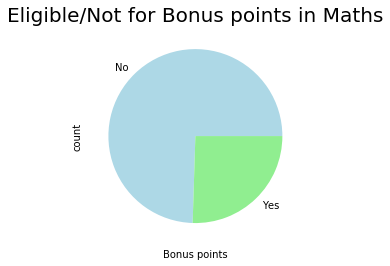

In [105]:
df['bonus_points'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])
plt.title('Eligible/Not for Bonus points in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('Bonus points')
plt.ylabel('count')
plt.show()